In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/duplicate_check/train.csv")
df.shape

(404290, 6)

In [5]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [7]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [8]:
# duplicate rows
df.duplicated().sum()

0

In [9]:
#Percentage of Similar question and Non-Similar Question
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)


0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


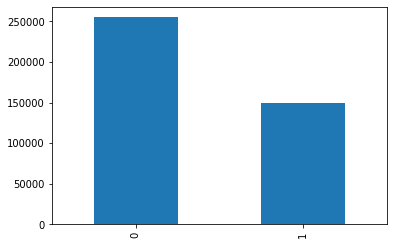

In [10]:
# Distribution of duplicate and non-duplicate questions
df['is_duplicate'].value_counts().plot(kind='bar')

In [18]:
# Repeated questions
qids = pd.Series(list(df['qid1']) + list(df['qid2'])) #Creating a dataframe that contains the question id of both quid1 and quid2
unique_qs = len(np.unique(qids))  #Numpy array to filter down all qniue elements
qs_morethan_onetime = np.sum(qids.value_counts() > 1)   # Counts any question that have been repeated more than one time
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#len(set(list(df['qid1'])+list(df['qid2'])))


print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,round(qs_morethan_onetime/unique_qs*100,2)))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) # Taking the frequency of all question and printing the max of them

q_vals=qids.value_counts()
print(q_vals)

q_vals=q_vals.values

Total number of  Unique Questions are: 537933

Number of unique questions that appear more than one time: 111780 (20.78%)

Max number of times a single question is repeated: 157

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
416446      1
416444      1
416441      1
416439      1
537933      1
Length: 537933, dtype: int64


**Here we can see questions with qid [2559 ,30182 4044] are some the question that are repeated multiple times
Lets have look at those questions one by one**

In [20]:
# Looking at questions that are asked most frequently 
print(df.loc[df['qid1']==2559]['question1'].head(1).values)
print('='*100)
print(" "*100)
print(df.loc[df['qid1']==30182]['question1'].head(1).values)
print('='*100)
print(" "*100)
print(df.loc[df['qid1']==4044]['question1'].head(1).values)

['What are the best ways to lose weight?']
                                                                                                    
['How is borderline personality disorder (BPD) treated?']
                                                                                                    
['How can I lose weight quickly?']


**Plotting Questions based on there frequency**

Maximum number of times a single question is repeated: 157



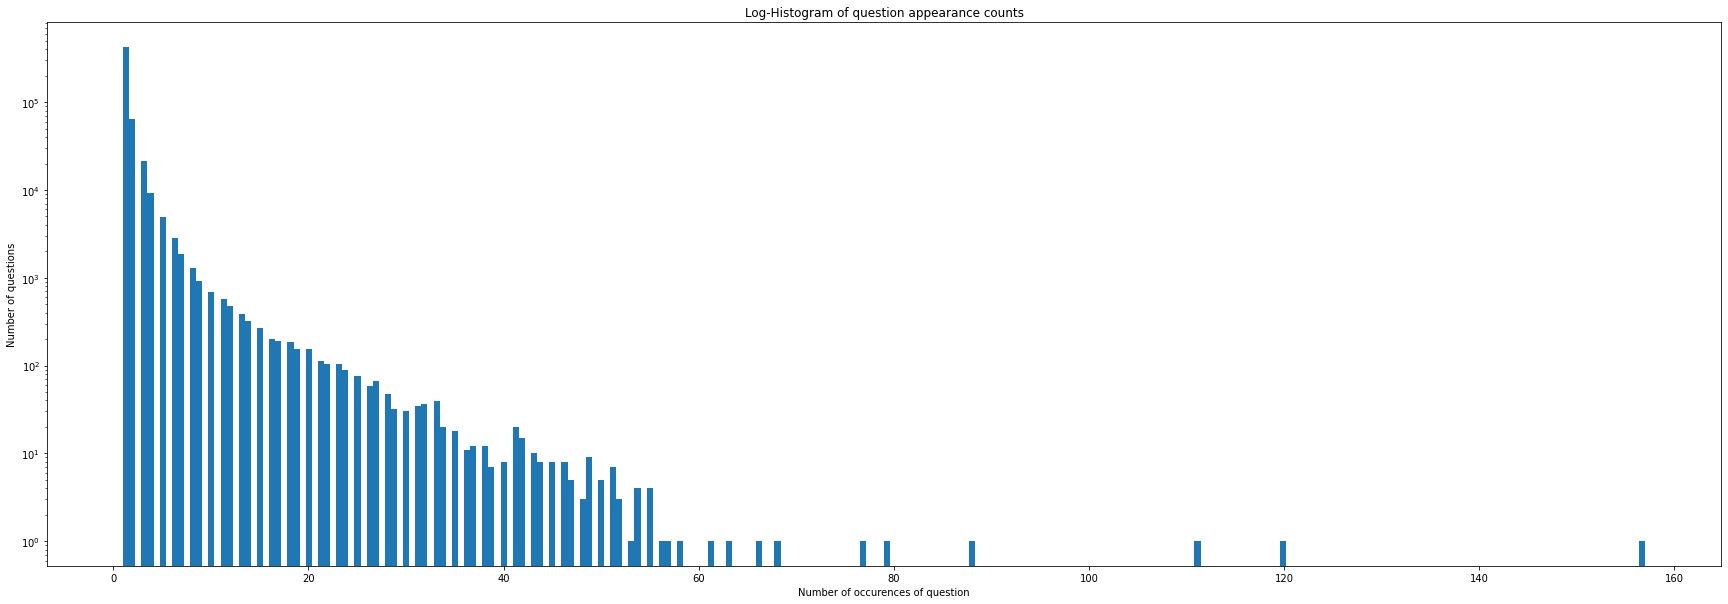

In [36]:
# Repeated questions histogram
plt.figure(figsize=(30, 10))

plt.hist(qids.value_counts(), bins=250)

plt.yscale('log')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

**Checking and Removing Null Value**

In [37]:
df[df.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0
